Este conjunto de bases de datos posee 30 de las acciones que componen el conocido índice del mercado estadounidense Dow Jones. 
Posee para cada una de las acciones información de los últimos 5 años con frecuencia díaria. Los campos de interes para este analisis son:

* *close*: Es el precio de cierre de la acción en la fecha *t*.
* *volume*: Es el volumen tranzado de la acción en la fecha *t*.
* *change*: Es el retorno respecto al día anterior de la acción en la fecha *t*.

In [37]:
import numpy as np                
import pandas as pd               
import seaborn as sns             
import matplotlib.pyplot as plt   
import scipy.stats                
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import time
import warnings
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import os

Ahora quiero saber exactamente cuales son los archivos y los tickers de las acciones que provee IEX Finance en este set de bases de datos.

In [2]:
lista = os.listdir("./input-market")
print(lista)

['AAPL.csv', 'AXP.csv', 'BA.csv', 'CAT.csv', 'CSCO.csv', 'CVX.csv', 'DIS.csv', 'DWDP.csv', 'GS.csv', 'HD.csv', 'IBM.csv', 'INTC.csv', 'JNJ.csv', 'JPM.csv', 'KO.csv', 'MCD.csv', 'MMM.csv', 'MRK.csv', 'MSFT.csv', 'NKE.csv', 'PFE.csv', 'PG.csv', 'TRV.csv', 'UNH.csv', 'UTX.csv', 'V.csv', 'VZ.csv', 'WBA.csv', 'WMT.csv', 'XOM.csv']


Este es un ejemplo de como vienen las bases de datos de las distintas acciones. En este caso es la información correspondiente a el ticker PFE, que es Pfizer:

In [38]:
df = pd.read_csv("./input-market/"+lista[1])
df.head(5)

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2014-02-21,82.5593,82.8838,82.0958,82.2720,3808678,3808678,-0.241023,-0.292,82.4970,"Feb 21, 14",0.000000
1,2014-02-24,82.3090,83.8293,82.3090,83.3566,3267762,3267762,1.084600,1.318,83.3748,"Feb 24, 14",0.013183
2,2014-02-25,83.4307,83.7737,82.6428,83.3473,2914759,2914759,-0.009270,-0.011,83.2966,"Feb 25, 14",0.013070
3,2014-02-26,83.5790,84.0704,82.6984,83.1804,4840187,4840187,-0.166861,-0.200,83.1949,"Feb 26, 14",0.011041
4,2014-02-27,83.1063,83.8293,82.9765,83.6996,3075588,3075588,0.519125,0.624,83.5780,"Feb 27, 14",0.017352


En esta sección busco crear tres bases de datos, estas son:

* *close*: dataframe donde se encuentran los precios de cierre de las 30 acciones mencionadas previamente.
* *volume*: dataframe donde se encuentran los volúmenes tranzados de las 30 acciones mencionadas previamente.
* *change*: dataframe donde se encuentran los retornos díarios de las 30 acciones mencionadas previamente.

En cada una de las bases de datos las columnas serán el nombre de las 30 acciones.

In [39]:
lista2 = [x.replace(".csv","") for x in lista ]
close = pd.DataFrame([0.0]*len(pd.read_csv("./input-market/"+lista[1])))
vol = pd.DataFrame([0.0]*len(pd.read_csv("./input-market/"+lista[1])))
change = pd.DataFrame([0.0]*len(pd.read_csv("./input-market/"+lista[1])))

for i in range(len(lista)):
    a = pd.read_csv("./input-market/"+lista[i])
    fecha = pd.DataFrame({"date":a.date})    
    close[lista2[i]] = a.close
    vol[lista2[i]] = a.volume
    change[lista2[i]] = a.change
print(close.shape == vol.shape == change.shape)
print(close.shape)

True
(1258, 31)


Como se puede observar, se cuentan con 1258 registros, lo cual equivale a 5 años de información díaria para cada acción.

In [40]:
print("Se tienen", len(lista), "acciones")

Se tienen 30 acciones


In [41]:
close = close.iloc[:,1:31]
vol = vol.iloc[:,1:31]
change = change.iloc[:,1:31]

Así es la estructura de las bases:

In [42]:
close.head(5)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
0,68.9821,82.2720,112.8920,83.4824,18.8421,92.1690,74.6463,65.2918,153.7179,69.8159,...,26.3114,66.3520,74.7163,68.2609,102.5660,53.9535,37.6033,60.9569,63.8826,78.7855
1,69.2841,83.3566,114.0449,83.3283,18.8335,93.3714,75.2052,63.1537,155.6242,69.9326,...,26.7547,66.2584,74.4042,70.2955,103.5527,54.6371,36.7760,61.1408,64.0836,79.9545
2,68.5631,83.3473,111.5720,82.5491,18.5951,94.0422,74.7208,63.0467,152.7648,72.7256,...,26.6710,66.4797,74.3151,69.6574,103.0193,54.8593,36.8238,61.5360,64.0836,79.8467
3,67.9446,83.1804,111.4224,83.2256,18.6718,94.4839,74.5997,62.8621,152.6428,73.3722,...,26.7547,66.2584,74.3953,70.3418,103.2149,54.6177,36.8715,61.1316,65.3329,79.4156
4,69.2999,83.6996,113.1385,82.7974,18.6633,94.6311,74.9724,63.0273,155.0618,73.6147,...,26.9554,66.5392,74.7698,70.3048,103.6594,54.6588,37.7863,62.6757,65.1407,79.4571


Ahora quiero saber como se encuentran correlacionadas las acciones con las que se estan trabajando. Así mismo, este gráfico de correlación ayuda a observar como se llevaría acabo el proceso de clustering jerarquico teniendo en cuenta que la medida de distancia en este caso sería la correlación.

Este ejercicio ser realizo para las tres bases. A continuación el mapa de calor de los precios de cierre:

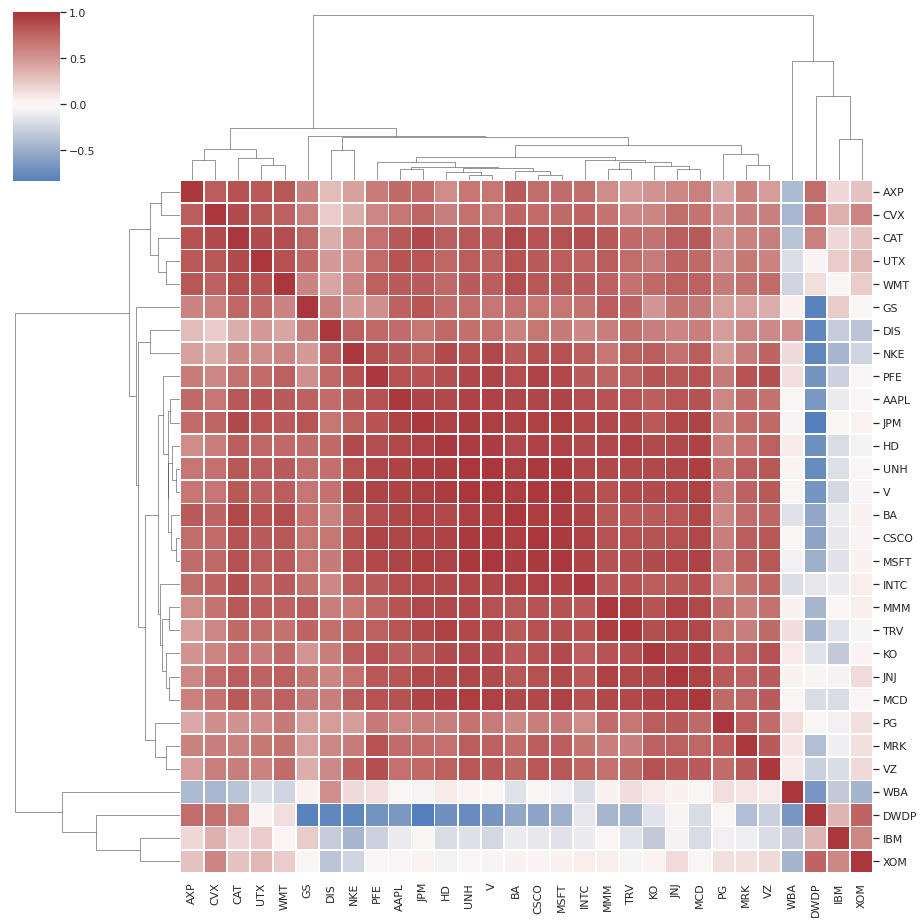

In [43]:
sns.clustermap(close.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))

Se puede observar que la mayoría de las acciones se encuentran correlacionadas positivamente, mientras que existe un grupo de 4 acciones (WBA, DWDP, XOM e IBM) que se encuentran correlacionadas negativamente con las demás acciones del Dow Jones dentro de esta muestra. 

Si se observa el denográma (margen izquierdo) este grupo de acciones correlacionadas negativamente, las clasificaría en un cluster aparte de las que se relacionan positivamente. Esto puede ser muy útil para quienes buscan formular estrategias en trading algoritmico como pairs trading o coberturas.

En los siguientes dos gráficos (volumen y retornos) no se pueden sacar conclusiones tan claras en terminos de clustering jerarquico. Se puede observar que el criterio de correlación no es muy diciente ya que no se pueden observar grupos o patrones dentro del mapa de calor.

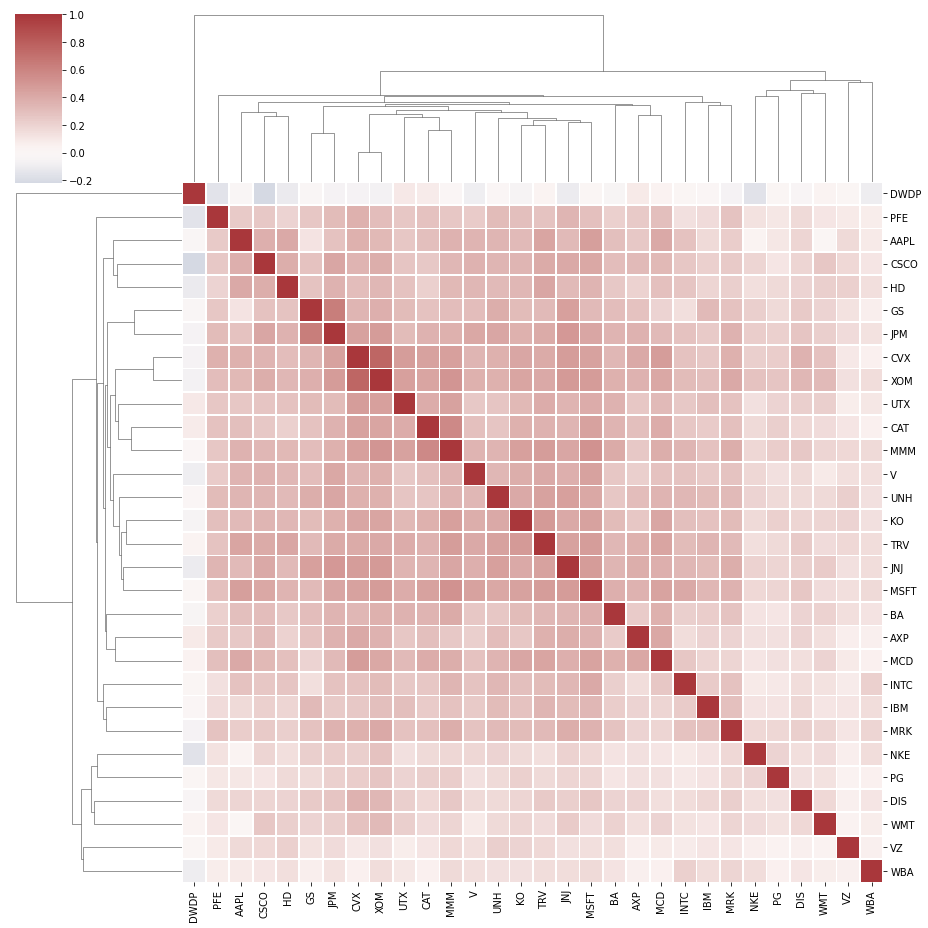

In [9]:
sns.clustermap(vol.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))

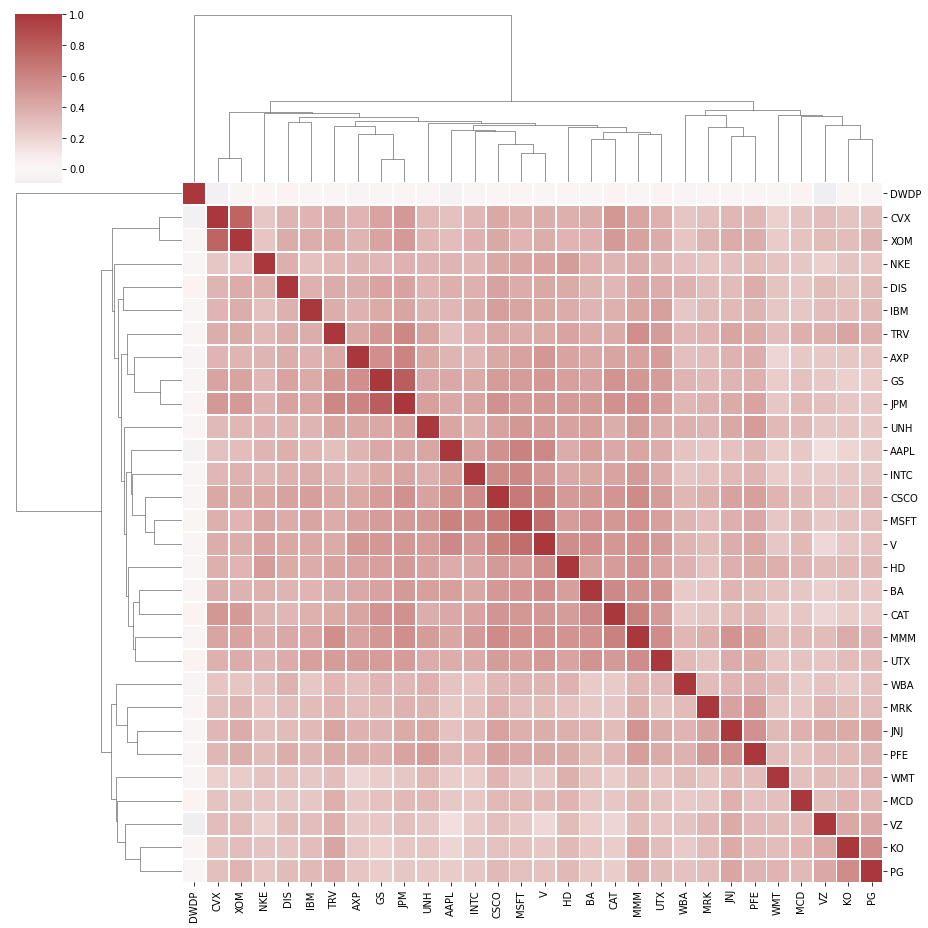

In [10]:
sns.clustermap(change.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))

Considero óptimo realizar el clustering en términos de los retornos. El porqué se basa en que al estandarizar la información para evitar un sesgo en el proceso de clustering, los precios de cierre se acercarán a los retornos y el volumen no me permitiría tener conclusiones precisas acerca del estado del mercado en términos agregados.

La base de datos de los retornos se verá así despues del proceso de estandarización:

In [44]:
df_scale = change.copy()
scaler = preprocessing.StandardScaler()
columns =change.columns
df_scale[columns] = scaler.fit_transform(df_scale[columns])
df_scale.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
0,-0.402284,-0.237512,-0.383128,0.259650,-0.390700,-1.216301,0.723021,18.312245,-0.012575,0.083446,...,-0.244276,0.022400,-0.053043,0.067337,0.218064,-0.076976,-1.424359,-0.194280,-0.395708,-0.321099
1,0.103730,0.971999,0.253872,-0.114954,-0.075946,0.902754,0.451671,-0.644066,0.659338,0.011972,...,1.197718,-0.164260,-0.306605,0.870624,0.772800,0.488788,-1.736335,0.154978,0.180788,1.334150
2,-0.376983,-0.026059,-0.759393,-0.474772,-0.607092,0.496455,-0.442181,-0.073018,-1.020427,1.650384,...,-0.267535,0.267398,-0.114512,-0.370817,-0.443359,0.119979,0.069839,0.341784,-0.029680,-0.122471
3,-0.328851,-0.169846,-0.110126,0.363160,0.120772,0.321429,-0.130931,-0.094876,-0.055556,0.336355,...,0.197623,-0.339258,0.031476,0.243459,0.139827,-0.250762,0.069835,-0.364842,1.278814,-0.491347
4,0.598618,0.456054,0.411263,-0.272682,-0.075955,0.096395,0.292057,0.003485,0.840049,0.088946,...,0.523240,0.349062,0.285034,-0.091602,0.338968,-0.024842,1.859594,1.357016,-0.230994,0.047777


Para corroborar, es necesario hacer un análisis de completitud de la información de las acciones.

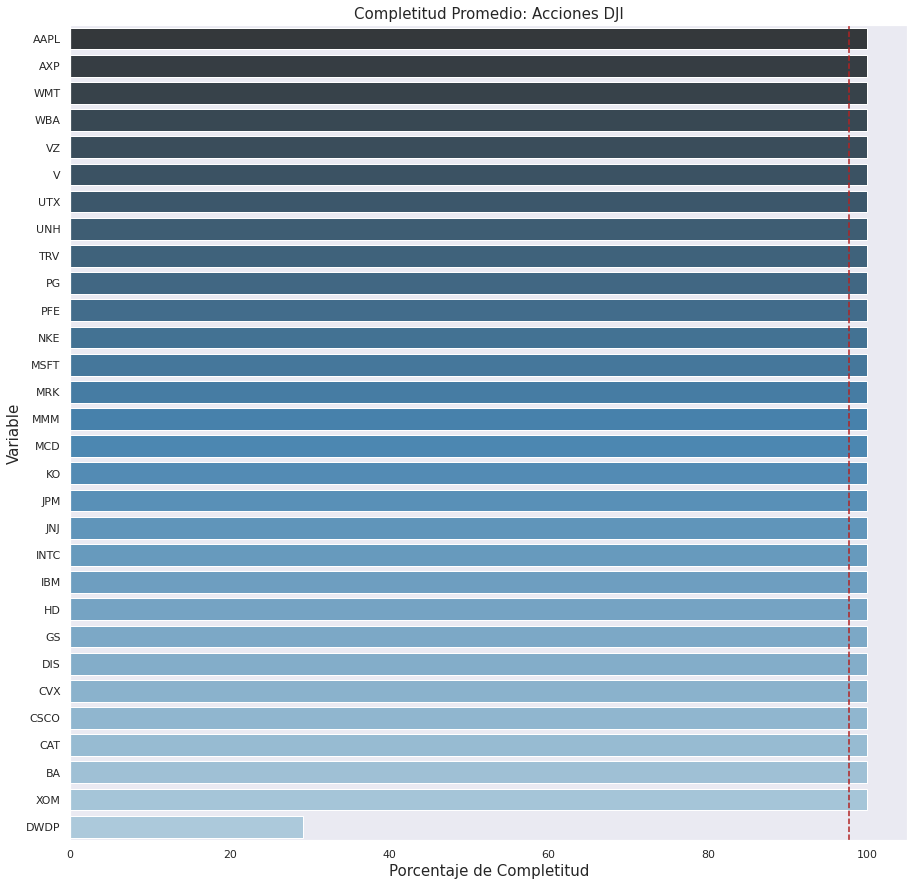

In [46]:
compl = pd.DataFrame({'Porcentaje de Completitud':df_scale.count()*100/len(df_scale)}).round(2)
compl['indexx'] = compl.index.values.tolist()
compl = compl.sort_values(['Porcentaje de Completitud'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(15,15))
sns.barplot(x=compl["Porcentaje de Completitud"],y=compl.indexx,palette='Blues_d')
plt.axvline(x=compl.mean()[0],linestyle='--',color='firebrick',label='Completitud Promedio: Acciones DJI')
plt.xlabel("Porcentaje de Completitud",fontsize=15)
plt.ylabel("Variable",fontsize=15)
plt.title("Completitud Promedio: Acciones DJI",fontsize=15)
plt.show()

Al observar el gráfico anterior, se puede observar que la única acción que tiene problemas de completitud es Dow Chemical Company (DWDP). Por ello se realizará un ejercicio de poblamiento de la acción por medio del retorno promedio del mercado (promedio de toda la base de datos).

In [47]:
a = pd.DataFrame(df_scale.describe()).mean(axis=1)[1]
print('La media de los retornos de todas las acciones es:', a)

La media de los retornos de todas las acciones es: -1.917328892265548e-18


Al ser el retorno medio tan cercano a cero, se esperaría que se cumpliera que los retornos son estacionarios con media cero. Ahora se procederá a reemplazar los valores faltantes en SWDP con el retorno medio del mercado.

In [48]:
df_scale = df_scale.fillna(a)
df_scale.shape

(1258, 30)

Para realizar un clustering eficiente, es necesario identificar que parámetros me ayudan a explicar mejor los datos bajo cierto modelo.
Por ello empezaré haciendo uso del algoritmo de clustering conocido como K-Means. Para identificar cual es el número óptimo de clusters (*k*) se construye el diagráma de codo para tratar de visualizar las dinámicas de la *inertia* a medida que se aumentan el número de clusters. 

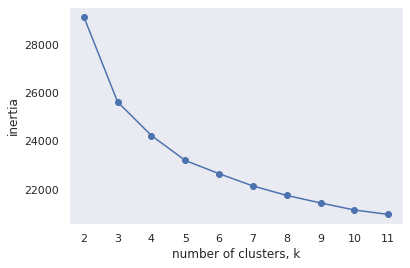

In [49]:
#Elbow graph
ks = range(2, 12)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_scale.iloc[:,1:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Se puede observar que el número óptimo de clusters estaría entre 2 y 3, bajo mi criterio es óptimo abordar el clustering con *k = 3*. Esperaría que estos tres clusters explicaran los tres posibles regímenes de mercado, estable, bull y bear.

In [59]:
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(df_scale)

# Determine the cluster labels of new_points: labels
df_scale['cluster'] = model.predict(df_scale)

df_scale.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,cluster
0,-0.402284,-0.237512,-0.383128,0.259650,-0.390700,-1.216301,0.723021,18.312245,-0.012575,0.083446,...,0.022400,-0.053043,0.067337,0.218064,-0.076976,-1.424359,-0.194280,-0.395708,-0.321099,0
1,0.103730,0.971999,0.253872,-0.114954,-0.075946,0.902754,0.451671,-0.644066,0.659338,0.011972,...,-0.164260,-0.306605,0.870624,0.772800,0.488788,-1.736335,0.154978,0.180788,1.334150,0
2,-0.376983,-0.026059,-0.759393,-0.474772,-0.607092,0.496455,-0.442181,-0.073018,-1.020427,1.650384,...,0.267398,-0.114512,-0.370817,-0.443359,0.119979,0.069839,0.341784,-0.029680,-0.122471,0
3,-0.328851,-0.169846,-0.110126,0.363160,0.120772,0.321429,-0.130931,-0.094876,-0.055556,0.336355,...,-0.339258,0.031476,0.243459,0.139827,-0.250762,0.069835,-0.364842,1.278814,-0.491347,0
4,0.598618,0.456054,0.411263,-0.272682,-0.075955,0.096395,0.292057,0.003485,0.840049,0.088946,...,0.349062,0.285034,-0.091602,0.338968,-0.024842,1.859594,1.357016,-0.230994,0.047777,0


Ahora por medio de los componentes principales se busca visualizar la distribución de los clusters en este caso.

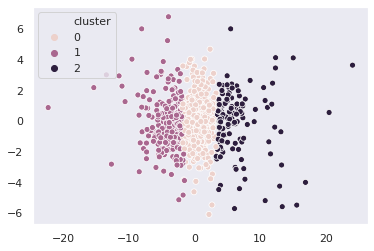

In [60]:
# Create PCA instance: model
model_pca = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model_pca.fit_transform(df_scale)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
sns.scatterplot(x=xs, y=ys, hue="cluster", data=df_scale)

Para entender que quiere decir cada cluster es necesario observar el comportamiento promedio de las acciones dentro de cada cluster.

In [61]:
centroids = model.cluster_centers_
df_scale.groupby(['cluster']).mean()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.042136,-0.020261,-0.058645,-0.074202,-0.061400,-0.088083,-0.038554,0.008366,-0.035225,-0.025766,...,-0.091352,-0.086084,-0.048948,-0.055577,-0.038844,-0.057231,-0.043418,-0.028223,-0.041804,-0.100673
1,0.685247,0.669131,0.752892,0.829245,0.855439,0.795459,0.714146,-0.014196,0.821853,0.729786,...,0.812511,0.729014,0.759059,0.725608,0.798724,0.829110,0.590044,0.583694,0.532890,0.841078
2,-1.139059,-1.236682,-1.177940,-1.240150,-1.369548,-1.088921,-1.219026,-0.021041,-1.457345,-1.326929,...,-1.104040,-0.966046,-1.248212,-1.140865,-1.388867,-1.340976,-0.938299,-1.015936,-0.831974,-1.106463


In [62]:
cero = []
uno = []
dos = []

cero = (df_scale.cluster==0).astype(int)*df_scale.AAPL
uno = (df_scale.cluster==1).astype(int)*df_scale.AAPL
dos = (df_scale.cluster==2).astype(int)*df_scale.AAPL

for i in range(len(cero)):
    if(cero[i] == 0):
        cero[i] = np.nan
    if(uno[i] == 0):
        uno[i] = np.nan
    if(dos[i] == 0):
        dos[i] = np.nan

Ahora quiero saber como es la distribución de los clusters. Como se puede observar en el histograma existe dominancia de un cluster dentro de este mercado.

Text(0.5, 1.0, 'Frecuencia')

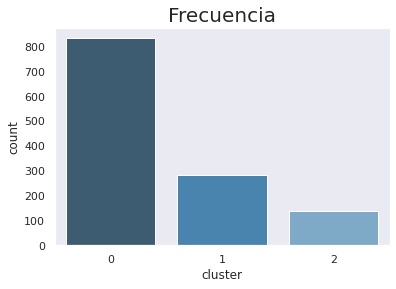

In [63]:
conf = df_scale.cluster
sns.set(style ="dark")
ax = sns.countplot(x = conf, palette='Blues_d')
ax.set_title(label='Frecuencia', fontsize=20)

Como era de esperarse, el clustering describe 3 clusters que son correspondientes a los regímenes naturales de mercado. Existe un regímen dominante, que lo caracteriza en promedio retornos aproximadamente de cero, mientras que el siguiente regímen más frecuente es parecido a un estado bullish, ya que trae consigo retornos positivos. Por último el regímen menos frecuente en este mercado es el de retornos negativos o bear.

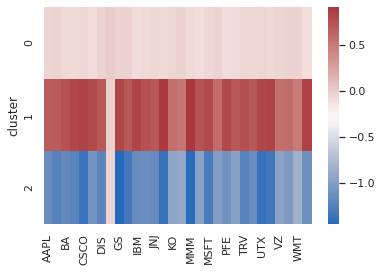

In [21]:
sns.heatmap(df_scale.groupby(['cluster']).mean(), cmap="vlag")

Es necesario tener en cuenta que el clustering se realizo a nivel de mercado y por eso es válido tener las acciones como variables, ya que se quiere identificar los regímenes a nivel de mercado, es decir, sobre el comportamiento del Dow Jones. Sin embargo se pueden identificar los regímenes de mercado que tan congruentes son con el comportamiento de las diversas acciones.

Y para no perder la costumbre de trabajar con la acción que más se ha estudiado en términos cuantitativos, se realizará un gráfico del comportamiento de los retornos de Apple a lo largo de los 5 años de estudio identificando con colores los diversos clusters a lo largo de la trayectoria de los retornos.

(-6.0, 6.0)

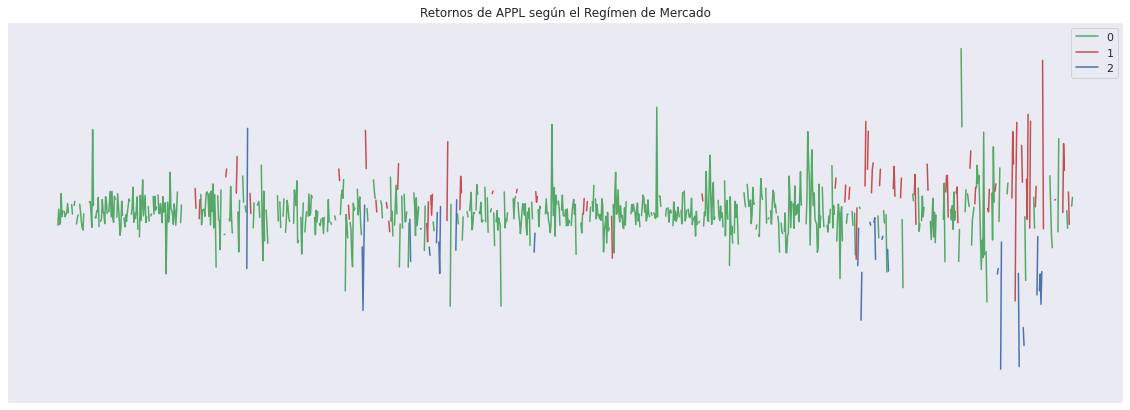

In [22]:
plt.figure(figsize=(20,7))
plt.title('Retornos de APPL según el Regímen de Mercado')
plt.plot(cero,color='g',label="0")
plt.plot(uno,color='r',label="1")
plt.plot(dos, color = 'b',label="2")
plt.legend()
plt.xticks([])
plt.yticks([])
plt.ylim((-6, 6))

Es válido comparar los resultados del clustering realizado previamente con K-Means ahora con un método de de **clustering** denominado **jerarquico**. Ahora el interrogante es si estos algoritmos detectan de igual forma los regímenes del mercado. Para ello se realizará el mismo proceso de estandarización y enriquecimiento de los datos.

In [64]:
df2 = change.copy()
scaler = preprocessing.StandardScaler()
columns =change.columns
df2[columns] = scaler.fit_transform(df2[columns])
df2.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
0,-0.402284,-0.237512,-0.383128,0.259650,-0.390700,-1.216301,0.723021,18.312245,-0.012575,0.083446,...,-0.244276,0.022400,-0.053043,0.067337,0.218064,-0.076976,-1.424359,-0.194280,-0.395708,-0.321099
1,0.103730,0.971999,0.253872,-0.114954,-0.075946,0.902754,0.451671,-0.644066,0.659338,0.011972,...,1.197718,-0.164260,-0.306605,0.870624,0.772800,0.488788,-1.736335,0.154978,0.180788,1.334150
2,-0.376983,-0.026059,-0.759393,-0.474772,-0.607092,0.496455,-0.442181,-0.073018,-1.020427,1.650384,...,-0.267535,0.267398,-0.114512,-0.370817,-0.443359,0.119979,0.069839,0.341784,-0.029680,-0.122471
3,-0.328851,-0.169846,-0.110126,0.363160,0.120772,0.321429,-0.130931,-0.094876,-0.055556,0.336355,...,0.197623,-0.339258,0.031476,0.243459,0.139827,-0.250762,0.069835,-0.364842,1.278814,-0.491347
4,0.598618,0.456054,0.411263,-0.272682,-0.075955,0.096395,0.292057,0.003485,0.840049,0.088946,...,0.523240,0.349062,0.285034,-0.091602,0.338968,-0.024842,1.859594,1.357016,-0.230994,0.047777


Ahora se esta utilizando otra libreria para realizar el clustering jerarquico. Por lo tanto, será necesario trabajar con matrices en vez del dataframe de pandas.

In [65]:
a = pd.DataFrame(df2.describe()).mean(axis=1)[1]
df2 = df2.fillna(a)
df2 = df2.values
print(df2)

[[-0.40228427 -0.23751247 -0.38312841 ... -0.1942796  -0.39570754
  -0.32109922]
 [ 0.10373027  0.97199884  0.25387176 ...  0.15497824  0.18078801
   1.3341504 ]
 [-0.37698258 -0.02605878 -0.75939279 ...  0.34178378 -0.02968016
  -0.12247123]
 ...
 [-0.21675139  0.67583065  2.20927839 ...  1.1589842   1.50997068
   1.64332299]
 [ 0.20143508 -0.8205213  -0.54619307 ...  0.87620794  2.28503301
   0.59373337]
 [ 0.47865981  0.23787398  1.41002399 ... -2.33153528 -2.4596053
   0.34274454]]


Para verificar que se tengan las mismas dimensiones que el dataframe...

In [66]:
print(df2.shape)

(1258, 30)


Se busca tratar de representar la lógica del clustering por medio de un denograma, pero la verdad debido a la dimensinalidad del problema, se torna un poco complicado.

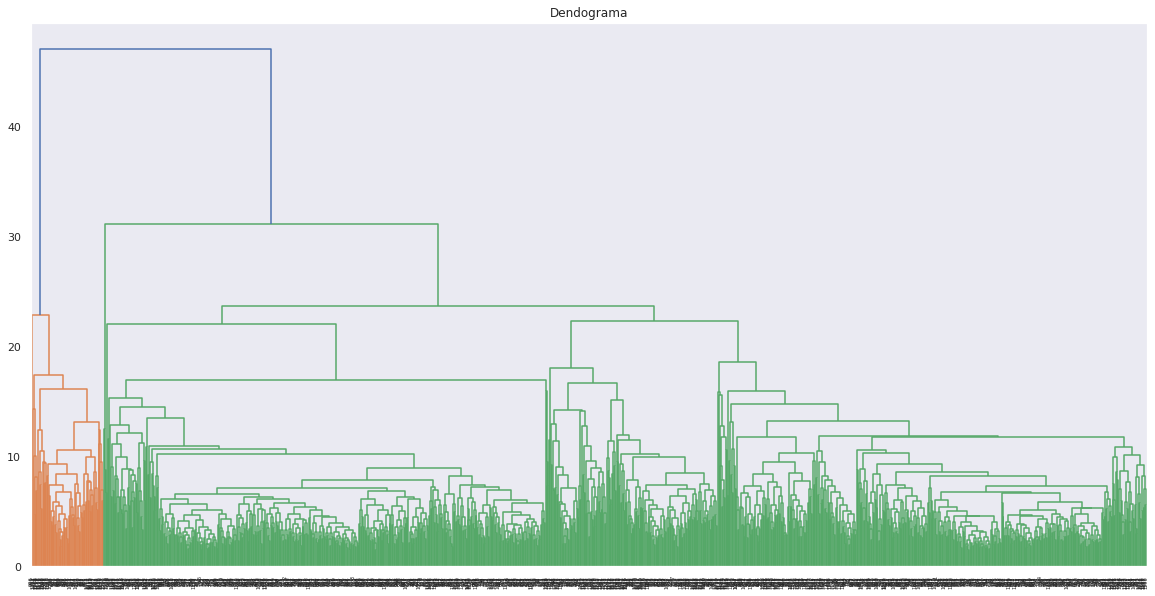

In [67]:
X = df2
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendograma')
plt.show()

Se procederá a realizar el clustering con el mismo número de clusters para poder comparar los resultados con la anterior sección. Es decir, se tendrán los mismos 3 regímenes de mercado en ambos tipos de clustering.

In [68]:
hc = AgglomerativeClustering(n_clusters = 3, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

Así se visualiza la distribución de los clusters:

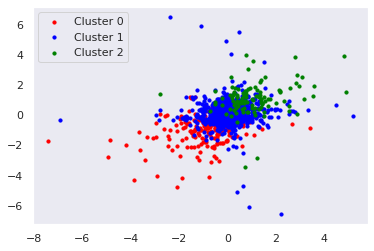

In [71]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.legend()
plt.show()

La frecuencia de los clusters empieza a mostrar que la distribución dentro de los clusters es similar al encontrado en K-Means.

Text(0.5, 1.0, 'Frecuencia')

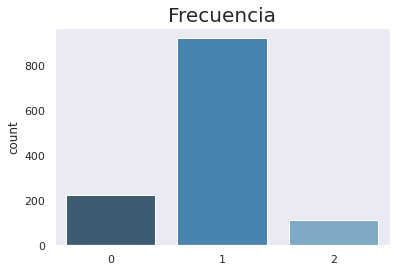

In [70]:
clusters = pd.DataFrame({'cluster':y_hc})
clusters = clusters.cluster.values.tolist()
conf = clusters
sns.set(style ="dark")
ax = sns.countplot(x = conf, palette='Blues_d')
ax.set_title(label='Frecuencia', fontsize=20)

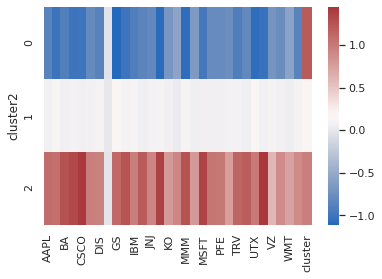

In [30]:
df_scale['cluster2'] = clusters
sns.heatmap(df_scale.groupby(['cluster2']).mean(), cmap="vlag")
cero = []
uno = []
dos = []

cero = (df_scale.cluster2==0).astype(int)*df_scale.AAPL
uno = (df_scale.cluster2==1).astype(int)*df_scale.AAPL
dos = (df_scale.cluster2==2).astype(int)*df_scale.AAPL

for i in range(len(cero)):
    if(cero[i] == 0):
        cero[i] = np.nan
    if(uno[i] == 0):
        uno[i] = np.nan
    if(dos[i] == 0):
        dos[i] = np.nan

(-6.0, 6.0)

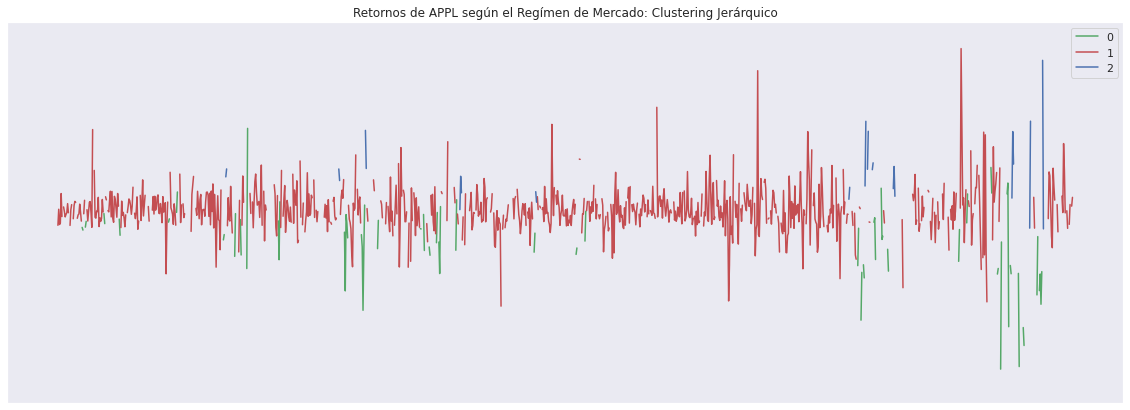

In [31]:
plt.figure(figsize=(20,7))
plt.title('Retornos de APPL según el Regímen de Mercado: Clustering Jerárquico')
plt.plot(cero,color='g',label="0")
plt.plot(uno,color='r',label="1")
plt.plot(dos, color = 'b',label="2")
plt.legend()
plt.xticks([])
plt.yticks([])
plt.ylim((-6, 6))

Ahora me gustaría analizar los resultados del clustering por medio de ambos clustering. Pero en este caso compondre un indice de mercado basado en las 30 acciones, teóricamente será similar a el índice el Dow Jones pero con pesos iguales todas las acciones. 

In [32]:
df_scale['DJI'] = df_scale.iloc[:,:30].sum(axis=1)

Ahora es necesario identificar si ambas metodologías de clustering arrojan resultados similares. Para ello graficaré ambos resultados asociados al índice de mercado.

In [33]:
cero = []
uno = []
dos = []

cero = (df_scale.cluster==0).astype(int)*df_scale.DJI
uno = (df_scale.cluster==1).astype(int)*df_scale.DJI
dos = (df_scale.cluster==2).astype(int)*df_scale.DJI

for i in range(len(cero)):
    if(cero[i] == 0):
        cero[i] = np.nan
    if(uno[i] == 0):
        uno[i] = np.nan
    if(dos[i] == 0):
        dos[i] = np.nan
        
        
cero1 = []
uno1 = []
dos1 = []

cero1 = (df_scale.cluster2==0).astype(int)*df_scale.DJI
uno1 = (df_scale.cluster2==1).astype(int)*df_scale.DJI
dos1 = (df_scale.cluster2==2).astype(int)*df_scale.DJI

for i in range(len(cero1)):
    if(cero1[i] == 0):
        cero1[i] = np.nan
    if(uno1[i] == 0):
        uno1[i] = np.nan
    if(dos1[i] == 0):
        dos1[i] = np.nan

([], <a list of 0 Text major ticklabel objects>)

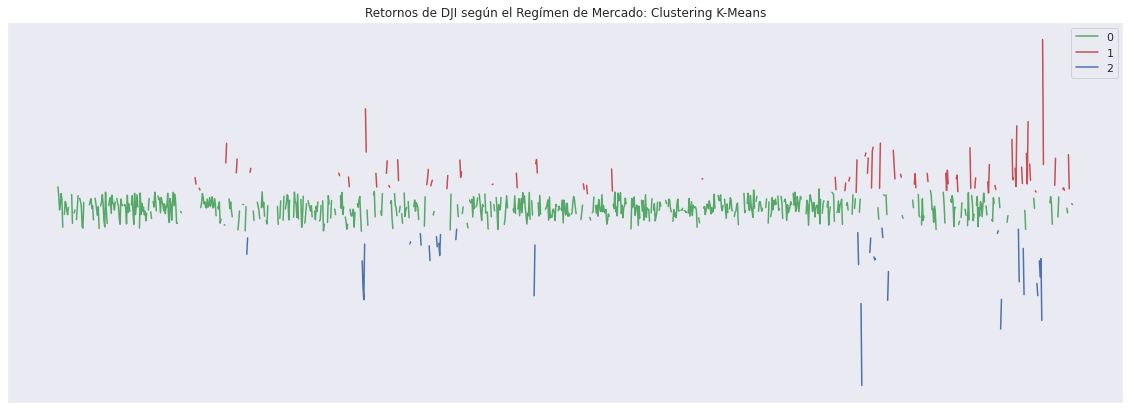

In [34]:
plt.figure(figsize=(20,7))
plt.title('Retornos de DJI según el Regímen de Mercado: Clustering K-Means')
plt.plot(cero,color='g',label="0")
plt.plot(uno,color='r',label="1")
plt.plot(dos, color = 'b',label="2")
plt.legend()
plt.xticks([])
plt.yticks([])


([], <a list of 0 Text major ticklabel objects>)

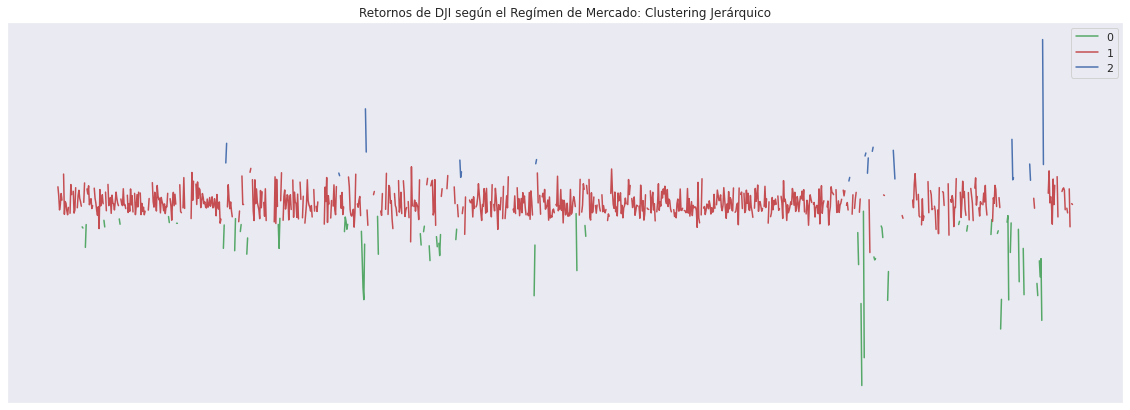

In [35]:
plt.figure(figsize=(20,7))
plt.title('Retornos de DJI según el Regímen de Mercado: Clustering Jerárquico')
plt.plot(cero1,color='g',label="0")
plt.plot(uno1,color='r',label="1")
plt.plot(dos1, color = 'b',label="2")
plt.legend()
plt.xticks([])
plt.yticks([])

Se puede concluir que el clustering jerarquico completo sería un agrupamiento conservador en términos de riesgo. Es claro que los retornos que se encuentran alrededor del cero ("la mitad") tienen una banda mas amplia en el caso jerarquico, mientras que los outlayers positivos y negativos son clasificados fuera del cluster de retornos de mercado "estable".

El clustering basado en K-Means sería un clustering con perfil de riesgo más arriesgado, ya que la banda que comprende los valores de retornos de mercado "estable" es menos amplia y considera outlayers un poco más bajos.

Estos clustering pueden ser usados en procesos de trading algorítmico para formular estrategias basados en los regímenes de mercado en que se encuentre el mercado.